### Excersice 14
Logistic Regression vs Quadratic Programming

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cvxopt

#### 2D

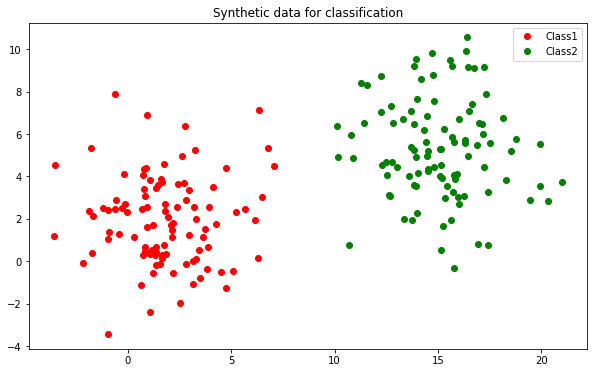

In [2]:
# Synthetic data
mu1 = np.array([2,2]) 
mu2 = np.array([15,5])
sigma = np.array([[5,0],[0,5]])

X1 = np.random.multivariate_normal(mu1,sigma,100)
X2 = np.random.multivariate_normal(mu2,sigma,100)

plt.figure(figsize=(10,6))
plt.plot(X1[:,0],X1[:,1],'ro',label='Class1')
plt.plot(X2[:,0],X2[:,1],'go',label='Class2')
plt.title('Synthetic data for classification')
plt.legend()
plt.show()

In [3]:
X1.shape,X2.shape

((100, 2), (100, 2))

#### Logistic Regession solution
- Traning data: $X \in R^{n}, y = \{0,1\}$
$$
2D: \mathbf{X} = \begin{vmatrix}1 & x_{1}^{1} & x_{2}^{1} \\1 & x_{1}^{2} & x_{2}^{2}\\: & : & :\\1 & x_{1}^{m} & x_{2}^{m}\end{vmatrix} , \mathbf{y} = \begin{vmatrix} 0\\0\\:\\1\end{vmatrix}
$$
- Structure: $h_{\theta}(x) = \frac{1}{1+e^{-x\theta}}$
- Cost function (*Binary Cross Entropy Cost Function*): $\ell(\theta) = -\frac{\sum_{i=1}^{m}[y^{(i)}log(\hat y^{(i)})+(1-y^{(i)})(1-log(\hat y^{(i)})]}{m}$
- Optimization (*Gradient descent*): $\theta^{(k+1)}\leftarrow \theta^{(k)} - \alpha\sum((\hat y^{(i)}-y^{(i)})\mathbf{x}^{i})$

**The basic algorithm**:

1. Choose an arbitrary $\theta^{(1)}$
2. Let $k = 1$
3. Calculate cost and gradient of the cost function for $\theta^{(k)}$
4. Take a step $\theta^{(k+1)} \leftarrow \theta^{(k)} - \alpha \sum_{i=1}^m (\hat{y}^{(i)} - y^{(i)}) \mathbf{x}^{(i)}$
5. Let $k \leftarrow k+1$
6. If not done, repeat from step 3.

- **Results**: $\theta_{0}+\theta_{1}X_{1}+\theta_{2}X_{2} = 0$$\rightarrow X_{2} = \frac{- \theta_{0} - \theta_{1}X_{1}}{\theta_{2}}$

In [4]:
# Training data
m = X1.shape[0]
n = X2.shape[0]
X = np.concatenate((np.ones((m+n,1)),np.concatenate((X1,X2),0)),1)
y = np.concatenate((np.zeros((m,1)),np.ones((n,1))),0)

In [5]:
# Cross entropy
theta = np.zeros((3,1))
alpha = 0.001

def sigmoid(a):
    return 1/(1+np.exp(a))

def cross_entropy(X,y,theta):
    yhat = sigmoid(-X@theta)
    cost = -(y*np.log(yhat) + (1-y)*np.log(1-yhat)).mean()
    grad = X.T@(yhat - y)
    return cost, grad

for epoch in range(1000):
    cost, grad = cross_entropy(X,y,theta)
    if epoch % 100 == 0:
        print('Epoch:%d Cost:%f'%(epoch,cost))
    theta = theta - alpha * grad

Epoch:0 Cost:0.693147
Epoch:100 Cost:0.132157
Epoch:200 Cost:0.080354
Epoch:300 Cost:0.059521
Epoch:400 Cost:0.048174
Epoch:500 Cost:0.040961
Epoch:600 Cost:0.035931
Epoch:700 Cost:0.032198
Epoch:800 Cost:0.029302
Epoch:900 Cost:0.026982


In [6]:
# Accuracy
y_pred = np.where(sigmoid(-X@theta)<=0.5,0,1)
accuracy = (y_pred == y).sum()/y.shape[0]
print('Accuracy:', accuracy*100)

Accuracy: 100.0


#### Quadratic Programming
- Traning data: $X \in R^{n}, y = \{-1,1\}$
$$
2D: \mathbf{X} = \begin{vmatrix}x_{1}^{1} & x_{2}^{1} \\x_{1}^{2} & x_{2}^{2}\\: & :\\x_{1}^{m} & x_{2}^{m}\end{vmatrix} , \mathbf{y} = \begin{vmatrix} -1\\-1\\:\\1\end{vmatrix}
$$
- Structure: $W^{T}\mathbf{x}+b$
- Cost function:
- Optimization(*Convex Optimization Problems*): 
$X^{*}=\underbrace{argmin}_{x}\frac{1}{2}X^{T}QX+C^{T}X$
Subject to $AX \leq b$

**Given**: $C \in R^{n} ; Q \in R^{nxn} ; A \in R^{mxn} ; b \in R^{m}$
- **n**: number of class, **m**: number of sample
$$
n = 2 :\mathbf{C} = \underbrace{\begin{vmatrix} 0\\0\\0\end{vmatrix}}_{(n+1)x1} ; \mathbf{Q} = \underbrace{\begin{vmatrix} 1&0&0\\0&1&0\\0&0&0\end{vmatrix}}_{(n+1)x(n+1)} ; \mathbf{A} = \underbrace{\begin{vmatrix} -x_{1}^{1}y^{1}&-x_{2}^{1}y^{1}&-y^{1}\\-x_{1}^{2}y^{2}&-x_{2}^{2}y^{2}&-y^{2}\\:&:&:\\-x_{1}^{m}y^{m}&-x_{2}^{m}y^{m}&-y^{m}\end{vmatrix}}_{mx3} ; \mathbf{X} = \underbrace{\begin{vmatrix} w_{1}\\w_{2}\\b\end{vmatrix}}_{(n+1)x1} ; \mathbf{b} = \underbrace{\begin{vmatrix} -1\\-1\\:\\-1\end{vmatrix}}_{mx1} 
$$

**Result**:
- Center line: $W^{T}\mathbf{x}+b = 0$
- Margin : $W^{T}\mathbf{x}+b = 1$
- Margin : $W^{T}\mathbf{x}+b = -1$

**n = 2**:

- Center line : $w_{1}x_{1}+w_{2}x_{2} + b = 0 \rightarrow x_{2} = \frac{-w_{1}x_{1}-b}{w_{2}}$
- Margin: $w_{1}x_{1}+w_{2}x_{2} + b = 1 \rightarrow x_{2} = \frac{-w_{1}x_{1}-b+1}{w_{2}}$
- Margin : $w_{1}x_{1}+w_{2}x_{2} + b = -1 \rightarrow x_{2} = \frac{-w_{1}x_{1}-b-1}{w_{2}}$

In [7]:
# Training data
X_qp = np.concatenate((X1,X2),0)
y_qp = np.concatenate((-np.ones((X1.shape[0],1)),np.ones((X2.shape[0],1))),0)
m = X_qp.shape[0]
n = np.unique(y_qp).shape[0]

In [8]:
X_qp.shape,y_qp.shape

((200, 2), (200, 1))

In [9]:
# Set Q,c,A,b
Q = np.eye(n+1)
Q[n,n] = 0
c = np.zeros((n+1,1))
A = -np.concatenate((X_qp,np.ones((m,1))),1)*y_qp
b = - np.ones((m,1))

In [10]:
A.shape

(200, 3)

In [11]:
# Convex optmization
def cvxopt_solve_qp(Q,c,A,b):
    Q = 0.5 * (Q + Q.T) # make sure Q is symmetric
    args = [cvxopt.matrix(Q),cvxopt.matrix(c),cvxopt.matrix(A),cvxopt.matrix(b)]
    sol = cvxopt.solvers.qp(*args)
    if 'optimal' not in sol['status']:
        return None
    return np.array(sol['x']).reshape((Q.shape[1],))

In [12]:
opt_params = cvxopt_solve_qp(Q,c,A,b)

     pcost       dcost       gap    pres   dres
 0:  8.8225e-03  4.8676e+01  6e+02  2e+00  2e+03
 1:  6.0863e-02 -1.0489e+02  2e+02  6e-01  7e+02
 2:  7.4276e-02 -1.1024e+02  2e+02  5e-01  6e+02
 3:  1.7088e-01 -3.4612e+01  5e+01  2e-01  2e+02
 4:  2.2780e-01 -1.8522e+00  2e+00  4e-03  5e+00
 5:  2.1155e-01  1.3354e-01  8e-02  7e-05  9e-02
 6:  2.0469e-01  2.0090e-01  4e-03  4e-06  4e-03
 7:  2.0435e-01  2.0429e-01  7e-05  6e-08  7e-05
 8:  2.0435e-01  2.0435e-01  1e-06  8e-10  9e-07
 9:  2.0435e-01  2.0435e-01  2e-08  8e-12  9e-09
Optimal solution found.


In [19]:
def find_b_w(alpha):
    w = alpha[0:2]
    b = alpha[2]
    return b, w.reshape(-1,1)
b, w = find_b_w(opt_params)

In [20]:
w

array([[0.63353759],
       [0.08557096]])

In [21]:
b

-5.858642285947818

In [22]:
X_qp.shape,w.shape

((200, 2), (2, 1))

In [23]:
# Accuracy
y_pred = np.where(X_qp@w + b >= 1,1,np.where(X_qp@w + b <= -1,-1,0))
accuracy = (y_pred == y_qp).sum()/ y_qp.shape[0]
print('Accuracy:', accuracy)

Accuracy: 1.0


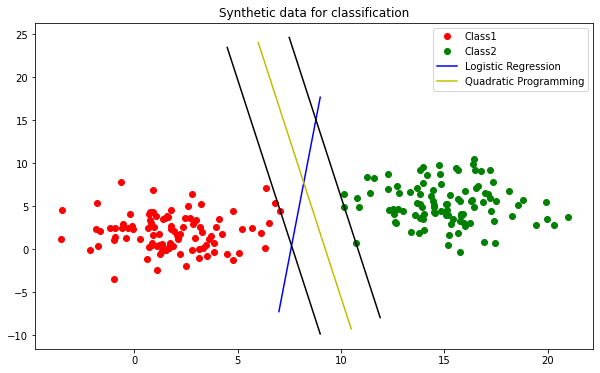

In [24]:
# plot result
plt.figure(figsize=(10,6))
plt.plot(X1[:,0],X1[:,1],'ro',label='Class1')
plt.plot(X2[:,0],X2[:,1],'go',label='Class2')
plt.title('Synthetic data for classification')

# Logistic Regression
x11 = 7
x12 = 9

x21 = (-theta[0]-theta[1]*x11)/theta[2]
x22 = (-theta[0]-theta[1]*x12)/theta[2]
plt.plot((x11,x12),(x21,x22),'b-',label="Logistic Regression")

# Quadratic Programming
x11 = 6
x12 = 10.5
x21 = (-w[0]*x11-b)/w[1]
x22 = (-w[0]*x12-b)/w[1]
plt.plot((x11,x12),(x21,x22),'y-',label="Quadratic Programming")

# Red margin: wT.x + b = -1
x11 = 4.5
x12 = 9
x21 = (-w[0]*x11-b-1)/w[1]
x22 = (-w[0]*x12-b-1)/w[1]
plt.plot((x11,x12),(x21,x22),'k-')

# Green margin: wT.x + b = 1
x11 = 7.5
x12 = 11.9
x21 = (-w[0]*x11-b+1)/w[1]
x22 = (-w[0]*x12-b+1)/w[1]
plt.plot((x11,x12),(x21,x22),'k-')

plt.legend()
plt.show()